In [1]:
import pandas
import matplotlib.pyplot as plt

pisa = pandas.DataFrame({"year": range(1975, 1988), 
                         "lean": [2.9642, 2.9644, 2.9656, 2.9667, 2.9673, 2.9688, 2.9696, 
                                  2.9698, 2.9713, 2.9717, 2.9725, 2.9742, 2.9757]})

print(pisa)

      lean  year
0   2.9642  1975
1   2.9644  1976
2   2.9656  1977
3   2.9667  1978
4   2.9673  1979
5   2.9688  1980
6   2.9696  1981
7   2.9698  1982
8   2.9713  1983
9   2.9717  1984
10  2.9725  1985
11  2.9742  1986
12  2.9757  1987


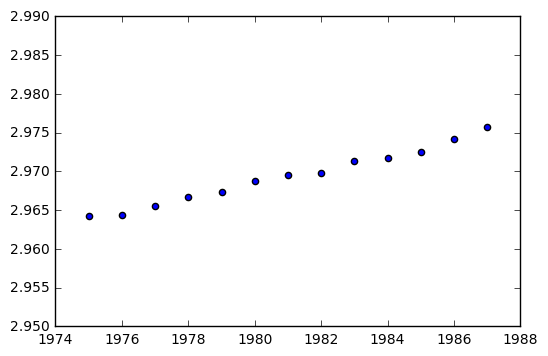

In [3]:
plt.scatter(pisa["year"], pisa["lean"])
plt.show()

In [4]:
import statsmodels.api as sm

y = pisa.lean # target
X = pisa.year  # features
X = sm.add_constant(X)  # add a column of 1's as the constant term

# OLS -- Ordinary Least Squares Fit
linear = sm.OLS(y, X)

# fit model
linearfit = linear.fit()

In [5]:
linearfit.summary()

/home/mark/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lean   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     904.1
Date:                Sun, 12 Feb 2017   Prob (F-statistic):           6.50e-12
Time:                        18:52:42   Log-Likelihood:                 83.777
No. Observations:                  13   AIC:                            -163.6
Df Residuals:                      11   BIC:                            -162.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.1233      0.061     18.297      0.000         0.988     1.258
year           0.0009    3.1e-05     30.069      0.000         0.001     0.001
==============================================================================
Omnibus:                        0.310   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.856   Jarque-Bera (JB):                0.450
Skew:                           0.094   Prob(JB):                        0.799
Kurtosis:                       2.108   Cond. No.                     1.05e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
# Our predicted values of y
yhat = linearfit.predict(X)
print(yhat)

residuals = y - yhat

[ 2.96377802  2.96470989  2.96564176  2.96657363  2.96750549  2.96843736
  2.96936923  2.9703011   2.97123297  2.97216484  2.9730967   2.97402857
  2.97496044]


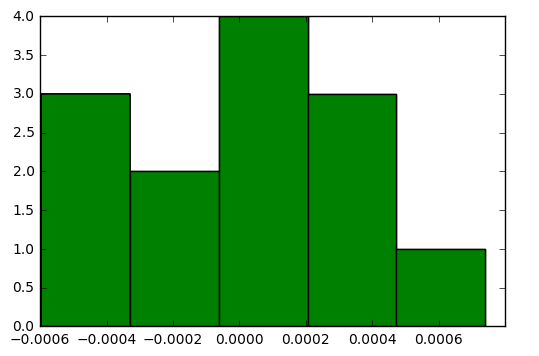

In [9]:
plt.hist(residuals, bins=5)
plt.show()

In [10]:
import numpy as np

# sum the (predicted - observed) squared
SSE = np.sum((y.values-yhat)**2)

RSS = np.sum((np.mean(y.values)-yhat)**2)

TSS = np.sum((y.values-np.mean(y.values))**2)

In [11]:
R2 = 1 - (SSE/TSS)

In [12]:
delta = linearfit.params["year"] * 15

In [14]:
# Compute variance in X
xvar = np.sum((pisa.year - pisa.year.mean())**2)

# Compute variance in b1 
s2b1 = SSE / ((y.shape[0] - 2) * xvar)

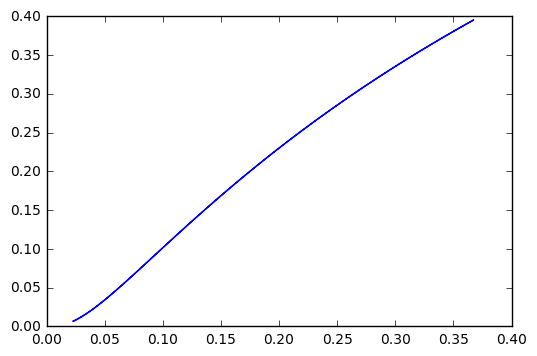

In [15]:
from scipy.stats import t

# 100 values between -3 and 3
x = np.linspace(-3,3,100)

# Compute the pdf with 3 degrees of freedom
tdist3 = t.pdf(x=x, df=3)
tdist30 = t.pdf(x=x, df=30)
plt.plot(tdist3, tdist30)
plt.show()

In [16]:
# The variable s2b1 is in memory.  The variance of beta_1
tstat = linearfit.params["year"] / np.sqrt(s2b1)

In [17]:
# At the 95% confidence interval for a two-sided t-test we must use a p-value of 0.975
pval = 0.975

# The degrees of freedom
df = pisa.shape[0] - 2

# The probability to test against
p = t.cdf(tstat, df=df)
beta1_test = True